## Part of Speech Tagging

In [38]:
from nltk import word_tokenize, pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sagh0521\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [39]:
print(pos_tag(word_tokenize("India Japan China is a great country")))

[('India', 'NNP'), ('Japan', 'NNP'), ('China', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('great', 'JJ'), ('country', 'NN')]


In [40]:
# To view all possible POS tags for NLTK lib
import nltk

In [41]:
# Application of {POS taggin}
comments = [  " I am using Mi note5 it is working great",
              " My Samsung s7 is hanging very often", 
              " My friend is using Motorola g5 for last 5 years and happy"
]

In [42]:
for i in range(0, 3):
    print(pos_tag(word_tokenize(comments[i])))
    print("\n")  

[('I', 'PRP'), ('am', 'VBP'), ('using', 'VBG'), ('Mi', 'NNP'), ('note5', 'NN'), ('it', 'PRP'), ('is', 'VBZ'), ('working', 'VBG'), ('great', 'JJ')]


[('My', 'PRP$'), ('Samsung', 'NNP'), ('s7', 'NN'), ('is', 'VBZ'), ('hanging', 'VBG'), ('very', 'RB'), ('often', 'RB')]


[('My', 'PRP$'), ('friend', 'NN'), ('is', 'VBZ'), ('using', 'VBG'), ('Motorola', 'NNP'), ('g5', 'NN'), ('for', 'IN'), ('last', 'JJ'), ('5', 'CD'), ('years', 'NNS'), ('and', 'CC'), ('happy', 'JJ')]




In [43]:
# Select all the words where tag is NNP 
for i in range(0, 3):
    token_comment = word_tokenize(comments[i])
    tagged_comment = pos_tag(token_comment)
    print ( [ (word, tag)  for word, tag in tagged_comment if ( tag == 'NNP')])

[('Mi', 'NNP')]
[('Samsung', 'NNP')]
[('Motorola', 'NNP')]


In [44]:
# NER ( Names Entity Recog)

# Tag Persons 
# Tag Historical Places 
# Tag Organization name 
# Tag Dates 

# You need to have context based information 

# Walking at the bank of river 
# Robbery in the bank 



We are intresetd in building a sentiment classifier with the help of TF-IDF 

In [45]:
import numpy as np
import pandas as pd 
import re
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sagh0521\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
# Load the dataset 
Airline_Tweets = pd.read_csv("Airline_Tweets\Airline_Tweets.csv")

In [47]:
# Lets check first few tweets 
Airline_Tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [48]:
Airline_Tweets.shape

(14640, 15)

In [49]:
%matplotlib inline

In [50]:
import seaborn as sns

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

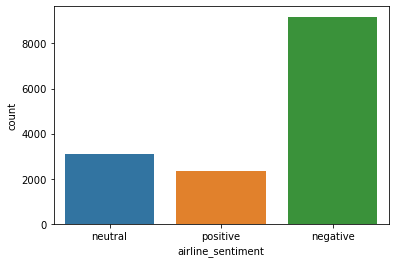

In [51]:
# Create a bar plot for each unique value of col - airline_sentiment
sns.countplot( x='airline_sentiment', data = Airline_Tweets )

<AxesSubplot:xlabel='airline', ylabel='count'>

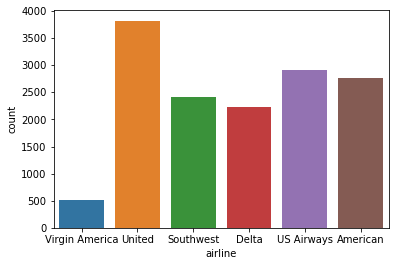

In [52]:
# Create a bar plot for each unique value of col that contains airline name 
sns.countplot( x='airline', data = Airline_Tweets )

For each airline count of comments for each category 

<AxesSubplot:xlabel='airline', ylabel='count'>

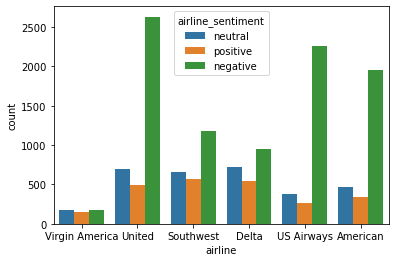

In [53]:
sns.countplot( x='airline',  hue = 'airline_sentiment', data = Airline_Tweets )

<AxesSubplot:xlabel='airline', ylabel='count'>

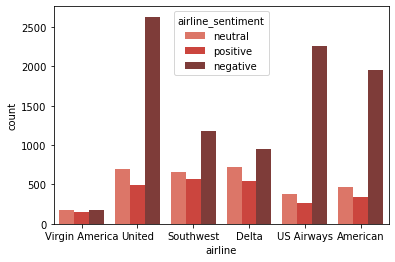

In [54]:
#sns.countplot( x='airline',  hue = 'airline_sentiment', data = Airline_Tweets , color= 'red')
sns.countplot( x='airline',  hue = 'airline_sentiment', data = Airline_Tweets , palette= 'Reds_d')
#sns.countplot( x='airline',   hue = 'airline_sentiment', data = Airline_Tweets , palette= 'Blues_r')

#WordCloud - I want to select all the tweet of negative sentiment and want to know which is the most common word 

In [55]:
neg_phrases = Airline_Tweets[ Airline_Tweets.airline_sentiment == 'negative']

In [56]:
neg_phrases.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
15,570282469121007616,negative,0.6842,Late Flight,0.3684,Virgin America,NaN,smartwatermelon,NaN,0,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24 10:01:50 -0800,"palo alto, ca",Pacific Time (US & Canada)
17,570276917301137409,negative,1.0000,Bad Flight,1.0000,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)


In [57]:
neg_words = []
for t in neg_phrases.text:  # Go to the "text" column of "neg_phrases" dataframe
    neg_words.append(t)
#neg_words[:4]

In [58]:
neg_words[4:9]

["@VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!",
 '@VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select???',
 '@VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet',
 "@VirginAmerica status match program.  I applied and it's been three weeks.  Called and emailed with no response.",
 "@VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won't be able 2 eat anything for next 6 hrs #fail"]

In [59]:
neg_text = pd.Series(neg_words).str.cat(sep = ' ')

In [62]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [64]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [65]:
wordcloud = WordCloud(width = 1600, height = 800, max_font_size = 200, background_color = 'white').generate(neg_text)

(-0.5, 1599.5, 799.5, -0.5)

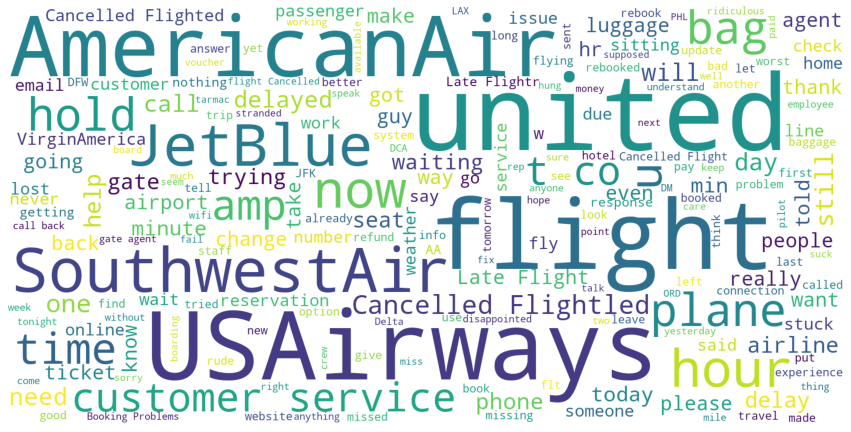

In [59]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

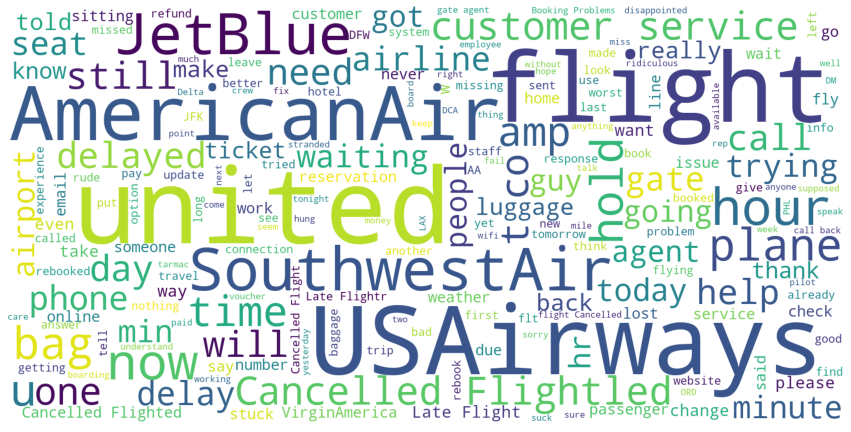

In [60]:
# Stopword - Most commonly used word are stopword 
from wordcloud import STOPWORDS
stop_words = list(STOPWORDS)

wordcloud = WordCloud(stopwords = stop_words, width = 1600, height = 800, max_font_size = 200,
                      background_color = 'white').generate(neg_text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

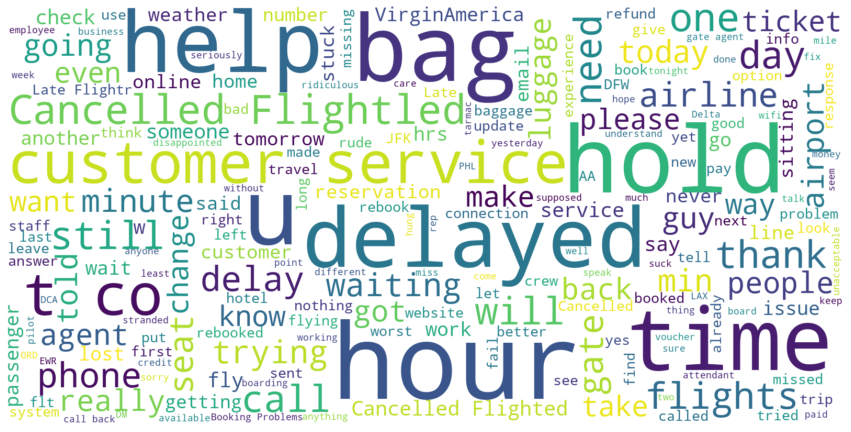

In [65]:
# Stopword - Most commonly used word are stopword 
# I want to update list ot stopwords
from wordcloud import STOPWORDS, ImageColorGenerator
stop_words = ["USAirways", "plane", "united", "SouthwestAir", "AmericanAir", "hr", "flight", "due", "now","JetBlue","amp"] + list(STOPWORDS)

wordcloud = WordCloud( stopwords = stop_words, width = 1600, height = 800, max_font_size = 200, 
                      background_color = 'white').generate(neg_text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [66]:
pos_phrases = Airline_Tweets[ Airline_Tweets.airline_sentiment == 'positive']

In [67]:
pos_phrases.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)
11,570289724453216256,positive,1.0000,NaN,NaN,Virgin America,NaN,HyperCamiLax,NaN,0,@VirginAmerica I &lt;3 pretty graphics. so muc...,NaN,2015-02-24 10:30:40 -0800,NYC,America/New_York


In [68]:
pos_words = []
for t in pos_phrases.text:  # Go to the "text" column of "neg_phrases" dataframe
    pos_words.append(t)
#neg_words[:4]

In [72]:
pos_words[1:5]

['@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)',
 "@virginamerica Well, I didn't…but NOW I DO! :-D",
 "@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",
 '@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D']

In [73]:
pos_text = pd.Series(pos_words).str.cat(sep = ' ')

(-0.5, 1599.5, 799.5, -0.5)

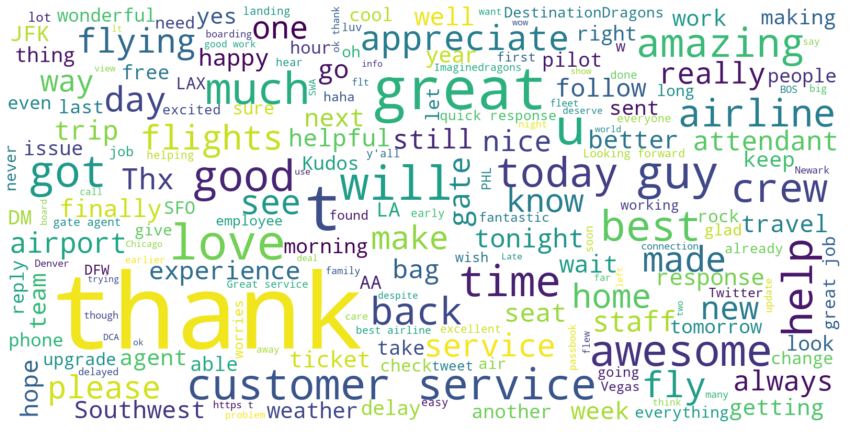

In [77]:
# Stopword - Most commonly used word are stopword 
# I want to update list ot stopwords
from wordcloud import STOPWORDS, ImageColorGenerator
stop_words = ["USAirways", "plane", "united", "SouthwestAir", "AmericanAir", "VirginAmerica","hr", "flight", 
              "due", "now","JetBlue","amp","co"] + list(STOPWORDS)

wordcloud = WordCloud(stopwords = stop_words, width = 1600, height = 800, max_font_size = 200, 
                      background_color = 'white').generate(pos_text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Let's divide date into features and label set

In [23]:
Airline_Tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [81]:
X = Airline_Tweets.iloc[ :, 10].values
y = Airline_Tweets.iloc[ :,  1].values

In [82]:
print(X.shape)
print(y.shape)

(14640,)
(14640,)


In [26]:
# @A@!!! great show 
#  A    grreat show 


In [83]:
processed_tweets = []
 
for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)

In [84]:
processed_tweets

[' virginamerica what dhepburn said ',
 ' virginamerica plus you ve added commercials to the experience tacky ',
 ' virginamerica didn today must mean need to take another trip ',
 ' virginamerica it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse',
 ' virginamerica and it a really big bad thing about it',
 ' virginamerica seriously would pay 30 flight for seats that didn have this playing it really the only bad thing about flying va',
 ' virginamerica yes nearly every time fly vx this ear worm won go away ',
 ' virginamerica really missed prime opportunity for men without hats parody there https co mwpg7grezp',
 ' virginamerica well didn but now do d',
 ' virginamerica it was amazing and arrived an hour early you re too good to me ',
 ' virginamerica did you know that suicide is the second leading cause of death among teens 10 24',
 ' virginamerica lt 3 pretty graphics so much better than minimal iconography d',
 ' virginamerica th

In [85]:
df = pd.DataFrame(processed_tweets, columns = ['processed_tweets'])

In [86]:
df.head(5)

,processed_tweets
0,virginamerica what dhepburn said
1,virginamerica plus you ve added commercials t...
2,virginamerica didn today must mean need to ta...
3,virginamerica it really aggressive to blast o...
4,virginamerica and it a really big bad thing a...


In [88]:
df.shape

(14640, 1)

This is the time to replace text with some numbers 

In [20]:
# Approach 01 - Tokenization or Count Vectorization 

In [21]:
corpus = ['This is Sentence One', 'This is Sentence Two', 'This is Sentence Three THREE thee']

In [89]:
corpus = ['This is good t-shirt', 'This is bad t-shirt', 'This is Sentence Three']

In [23]:
corpus

['This is good t-shirt', 'This is bad t-shirt', 'This is Sentence Three']

In [90]:
from sklearn.feature_extraction import text

In [97]:
cv = text.CountVectorizer(input=corpus)

In [98]:
matrix = cv.fit_transform(corpus)

In [99]:
import pandas as pd
pd.DataFrame(matrix.toarray(), columns=cv.get_feature_names())

C:\Users\kushwami\Anaconda3\envs\py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bad,good,is,sentence,shirt,this,three
0,0,1,1,0,1,1,0
1,1,0,1,0,1,1,0
2,0,0,1,1,0,1,1


In [28]:
# Approach 02 - Tockenization or Count Vectorization with the help of n-grams 

In [102]:
# Create bi-gram 
#ngram_range tuple (min_n, max_n), (1,1)
# (1,1) = Umigram
# (1,2) = Unigram and bigram
# (2,2) = Bigram
#min_n< = n <= max_n
cv1 = text.CountVectorizer(input=corpus, ngram_range=(2,2))
matrix1 = cv1.fit_transform(corpus)
pd.DataFrame(matrix1.toarray(), columns=cv1.get_feature_names())

C:\Users\kushwami\Anaconda3\envs\py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bad shirt,good shirt,is bad,is good,is sentence,sentence three,this is
0,0,1,0,1,0,0,1
1,1,0,1,0,0,0,1
2,0,0,0,0,1,1,1


In [103]:
# Create tri-gram 
cv2 = text.CountVectorizer(input=corpus, ngram_range=(3,3))
matrix2 = cv2.fit_transform(corpus)
pd.DataFrame(matrix2.toarray(), columns=cv2.get_feature_names())

C:\Users\kushwami\Anaconda3\envs\py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,is bad shirt,is good shirt,is sentence three,this is bad,this is good,this is sentence
0,0,1,0,0,1,0
1,1,0,0,1,0,0
2,0,0,1,0,0,1


In [31]:
# Create uni-gram, bi-gram, tri-gram 
cv3 = text.CountVectorizer(input=corpus, ngram_range=(1,3))
matrix3 = cv3.fit_transform(corpus)
pd.DataFrame(matrix3.toarray(), columns=cv3.get_feature_names())

C:\Users\kushwami\Anaconda3\envs\py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bad,bad shirt,good,good shirt,is,is bad,is bad shirt,is good,is good shirt,is sentence,is sentence three,sentence,sentence three,shirt,this,this is,this is bad,this is good,this is sentence,three
0,0,0,1,1,1,0,0,1,1,0,0,0,0,1,1,1,0,1,0,0
1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0
2,0,0,0,0,1,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1


In [32]:
# Higher order grams will give you Contextual Information 

In [33]:
# Approach -3 ( TF-IDF, Term Frequency and Inverse Document Freq)
corpus = ['This is Sentence One', 'This is Sentence Two', 'This is Sentence Three']

In [34]:
corpus

['This is Sentence One', 'This is Sentence Two', 'This is Sentence Three']

In [35]:
# Which Word is the most important word in each document/Sentence ?

In [36]:
# What makes a word important 
# 1 - IF the word ocuurs a lot in the document 
# 2 - If the word ocurrs rarely in the corpus 


In [104]:
tf = text.TfidfVectorizer(input=corpus, ngram_range=(1,1))
matrix5 = tf.fit_transform(corpus)
pd.DataFrame(matrix5.toarray(), columns=tf.get_feature_names())

C:\Users\kushwami\Anaconda3\envs\py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bad,good,is,sentence,shirt,this,three
0,0.00000,0.66284,0.391484,0.000000,0.504107,0.391484,0.000000
1,0.66284,0.00000,0.391484,0.000000,0.504107,0.391484,0.000000
2,0.00000,0.00000,0.359594,0.608845,0.000000,0.359594,0.608845


In [105]:
tf1 = text.TfidfVectorizer(input=corpus, ngram_range=(2,2))
matrix6 = tf1.fit_transform(corpus)
pd.DataFrame(matrix6.toarray(), columns=tf1.get_feature_names())

C:\Users\kushwami\Anaconda3\envs\py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bad shirt,good shirt,is bad,is good,is sentence,sentence three,this is
0,0.000000,0.652491,0.000000,0.652491,0.000000,0.000000,0.385372
1,0.652491,0.000000,0.652491,0.000000,0.000000,0.000000,0.385372
2,0.000000,0.000000,0.000000,0.000000,0.652491,0.652491,0.385372


In [39]:
# Similarity of Text Documents 
# Cosine Similarity ( Correlation of textual Features)
corpus2 = ['This is Sentence One', 'Trump is Republic',  'This is Sentence Three', 'Trump is Republic and American']

In [40]:
tf1 = text.TfidfVectorizer(input=corpus2, ngram_range=(1,2))
matrix7 = tf1.fit_transform(corpus2)
#pd.DataFrame(matrix7.toarray(), columns=tf1.get_feature_names())

from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(matrix7)

array([[1.        , 0.0751592 , 0.5797162 , 0.0480178 ],
       [0.0751592 , 1.        , 0.0751592 , 0.63888126],
       [0.5797162 , 0.0751592 , 1.        , 0.0480178 ],
       [0.0480178 , 0.63888126, 0.0480178 , 1.        ]])

from the processed tweets lets create a tf-idf matrix 


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tfidfconvertor = TfidfVectorizer(max_features=5000, min_df = 5, max_df = .7, stop_words= stopwords.words('english'))

# min_df = word should be present in atleast 5 documents 
# max_df = word must not occur in more than 70 percent of document ?

In [ ]:
tf1 = text.TfidfVectorizer(input=corpus, ngram_range=(1,2))
matrix6 = tf1.fit_transform(corpus)
pd.DataFrame(matrix6.toarray(), columns=tf1.get_feature_names())

In [30]:
X = tfidfconvertor.fit_transform(processed_tweets).toarray()

In [78]:
X = tfidfconvertor.fit_transform(processed_tweets)

In [31]:
# In X now we have tf-idf values for the text corpus 
# X is ready to be used in ML module 
# and we also have "y" which is our label 
